In [3]:
import math
from timeit import timeit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 300

recurse = 0
def cube(x):
    return x * x * x
def p(x):
    return (3 * x) - (4 * cube(x))
def sine(angle, root=True):
    global recurse
    if root: recurse = 0
    if (not (abs(angle) > 0.1)):
        return angle
    else:
        recurse += 1
        return p(sine((angle / 3.0), root=False))

In [4]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [83]:
df = pd.DataFrame(columns=["i", "r", "time"])

for i in np.geomspace(0.1, 30, num=100):
    wrapped = wrapper(sine, i)
    elapsed = timeit(wrapped, number=5000)
    df.loc[len(df.index)] = i, recurse, elapsed
    
df.head()

,i,r,time
0,0.100000,0.0,0.004909
1,0.105931,1.0,0.025367
2,0.112213,1.0,0.022252
3,0.118868,1.0,0.016684
4,0.125917,1.0,0.014555


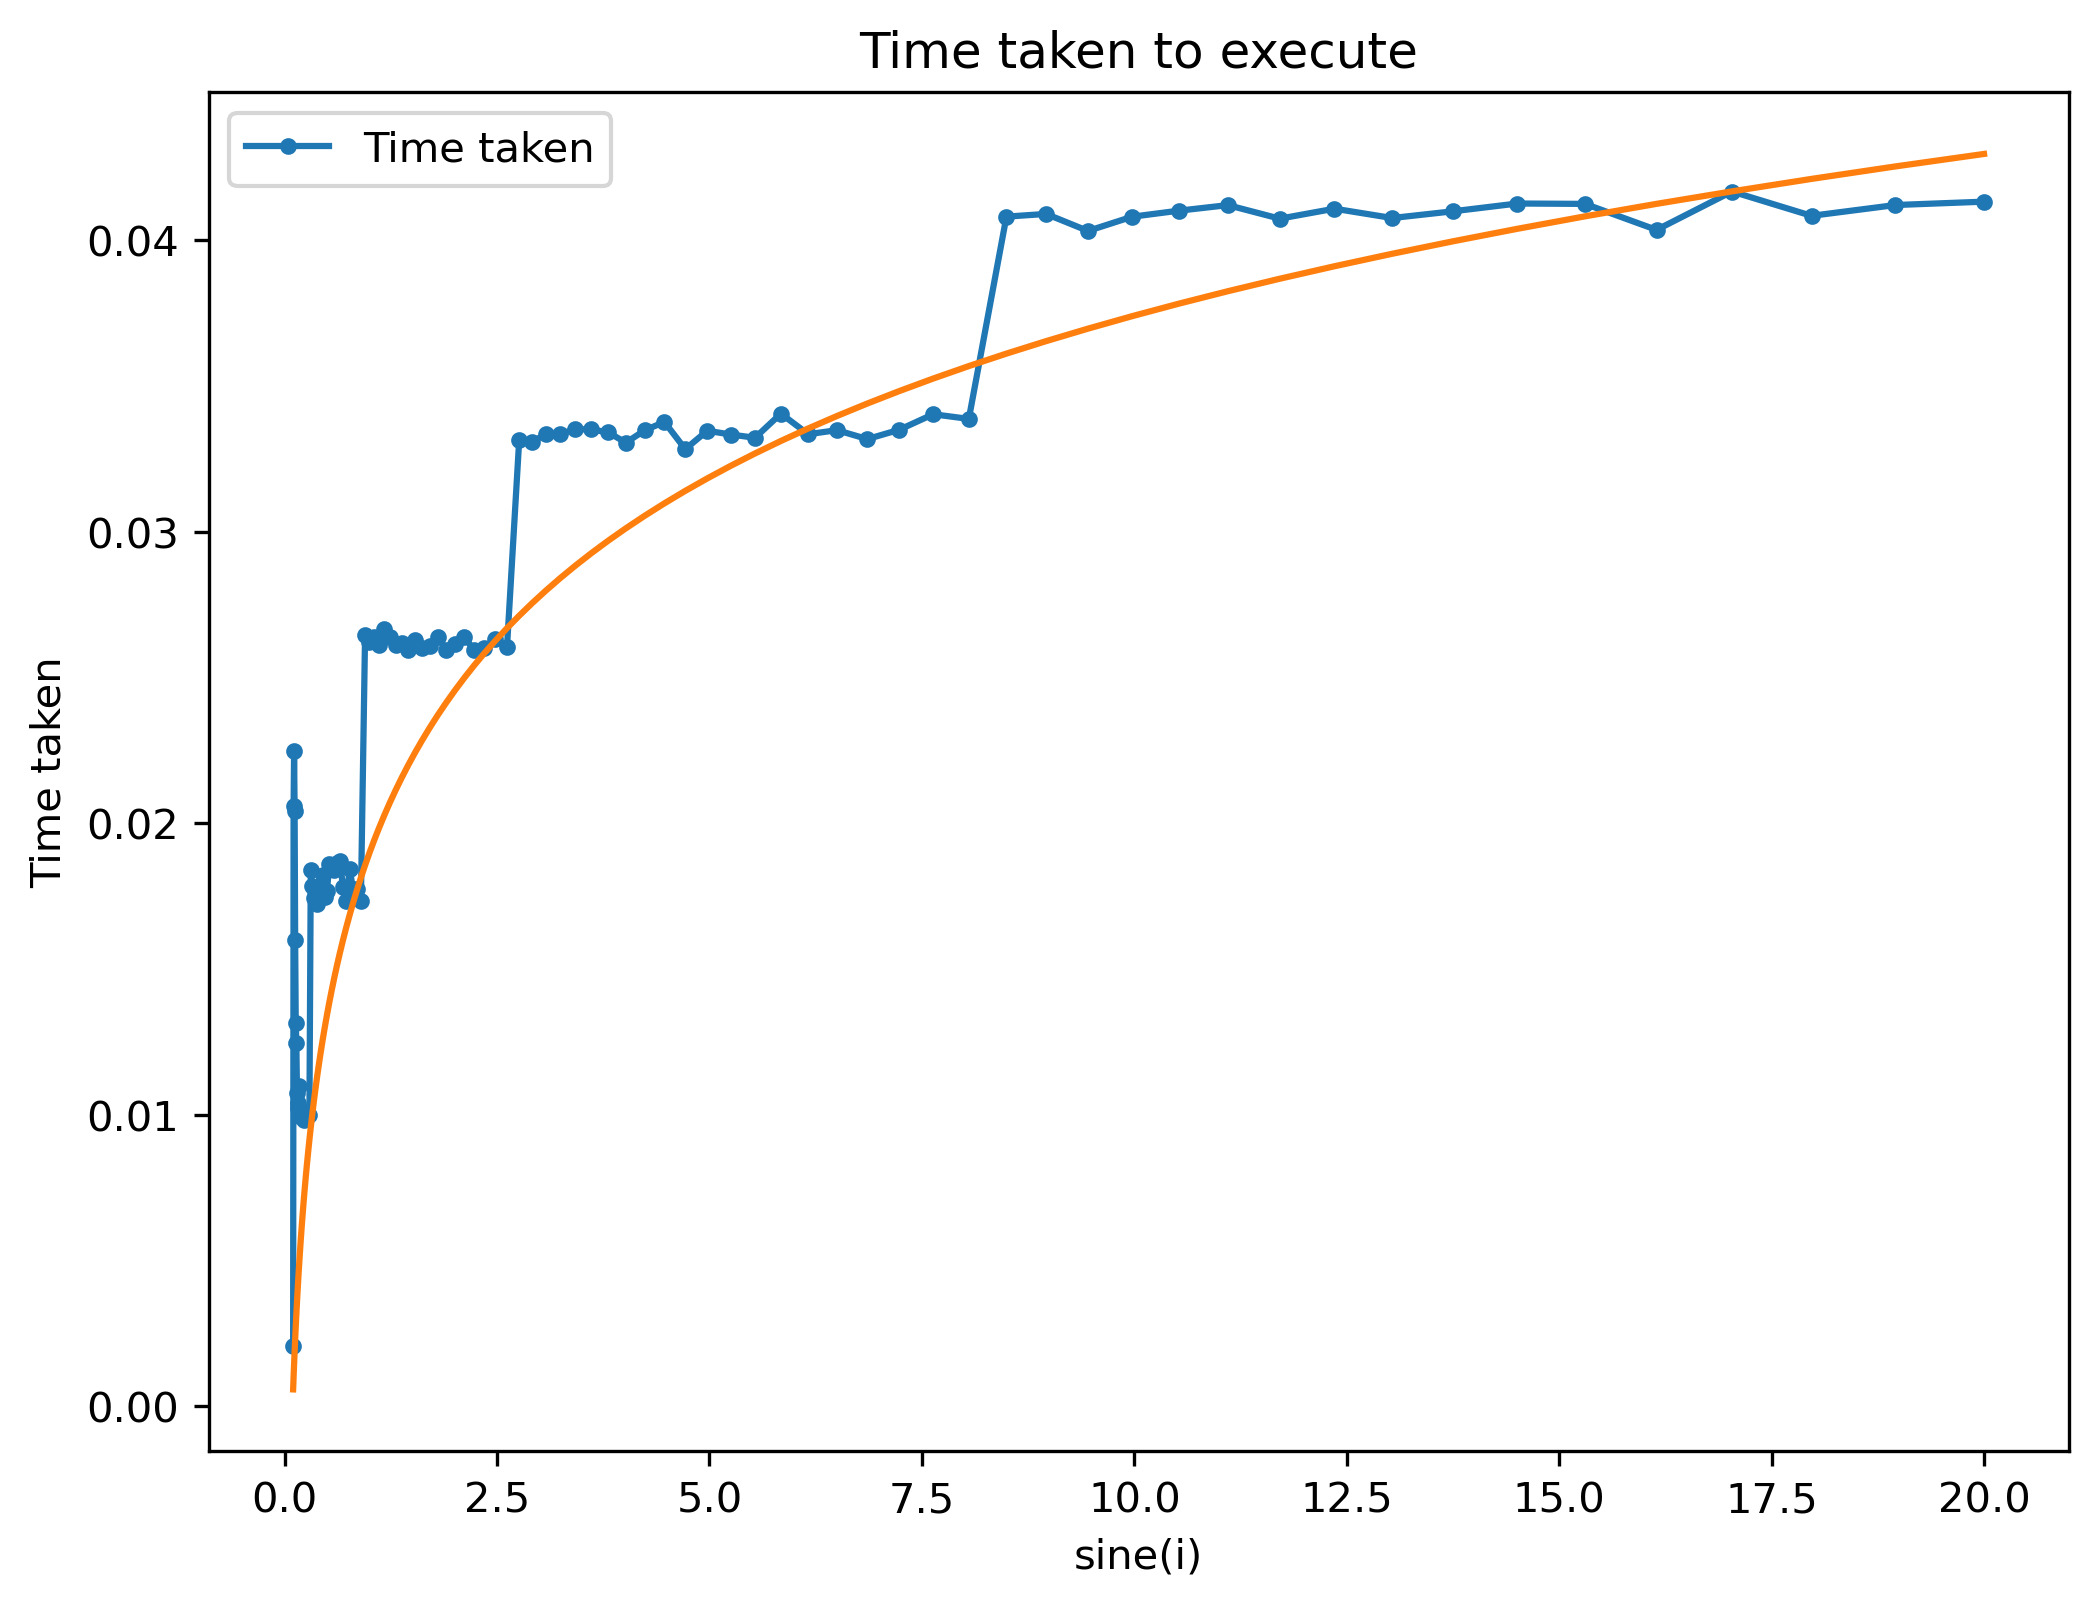

In [41]:
plt.plot(df["i"], df["time"], marker='o', ms=3, linestyle='solid', label='Time taken'); plt.ylabel("Time taken")
plt.xlabel("sine(i)")
plt.legend()
plt.title("Time taken to execute")
plt.plot(df["i"], (df["i"].apply(math.log) * 0.008) + 0.019)